# 3章 分類問題 - 機械学習アルゴリズムscikit-learnの活用

2018/05/02



In [3]:
from sklearn import datasets

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## 3.2.1 scikit-learn を使ったパーセプトロンのトレーニング

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, [2, 3]]

In [6]:
y = iris.target

In [7]:
print("Class labels: {}".format(np.unique(y)))

Class labels: [0 1 2]


In [46]:
from sklearn.cross_validation import train_test_split

# トレーニングデータとテストデータに分割
# 全体の30%をテストデータとする

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [47]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [48]:
len(X_train), len(X_test), len(X_test) / len(X)

(105, 45, 0.3)

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#　トレーニングデータの平均と標準偏差を計算

sc.fit(X_train)

# 平均、標準偏差を用いて標準化

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [50]:
# X_train_std, X_test_std

In [51]:
len(X_train_std)

105

In [52]:
from sklearn.linear_model import Perceptron

"""
エポック数40、学習率0．1でパーセプトロンのインスタンスを生成
"""
ppn = Perceptron(max_iter=105, eta0=0.1, random_state=0, shuffle=True)


"""
トレーニングデータに適合させる
"""
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=105, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

### memo: そのままの写経だと DeprecationWarning でるのでドキュメントを確認する

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [53]:
"""
テストデータで予測を実施
"""
y_pred = ppn.predict(X_test_std)

"""
誤分類のサンプルの個数を表示
"""
print("length: {}\nMisclassified samples: {}".format(len(y_test), (y_test != y_pred).sum()))


length: 45
Misclassified samples: 1


### 決定領域のプロット

In [54]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_reqions(X, y, classifier, test_idx=None, resolusion=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolusion),
        np.arange(x2_min, x2_max, resolusion)
    )
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contour(xx1, xx2, z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl
        )
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            x=X_test[:, 0], 
            y=X_test[:, 1], 
            c="gray", alpha=1.0, 
            linewidths=.1, marker='.', s=55, label='test set'
        )

In [55]:
import matplotlib
# help(matplotlib.markers)

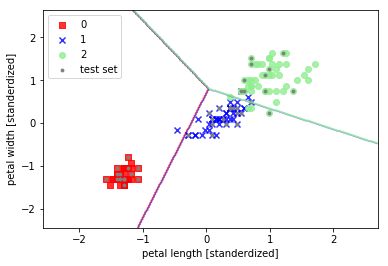

In [56]:
""" トレーニングデータとテストデータの特徴量を行方向に結合
"""
X_combined_std = np.vstack((X_train_std, X_test_std))

""" トレーニングデータとテストデータのクラスラベルの結合
"""
y_combined = np.hstack((y_train, y_test))

""" 決定領域のプロット
"""
plot_decision_reqions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

""" 軸ラベルのプロット
"""
plt.xlabel("petal length [standerdized]")
plt.ylabel("petal width [standerdized]")

""" 凡例の設定
"""
plt.legend(loc='upper left')

""" グラフの表示
"""

plt.show()

In [57]:
"""
help関数を使ってdocumentを確認すると良い
"""
# help(Perceptron)

'\nhelp関数を使ってdocumentを確認すると良い\n'

## 3.3 ロジスティック回帰を使ったクラスの確率モデリング

In [58]:
import matplotlib.pyplot as plt
import numpy as np


""" シグモイド関数を定義　"""
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

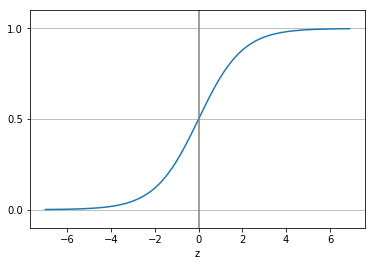

In [59]:
""" 0．1間隔で-7 +7 のデータを生成　"""
z = np.arange(-7, 7, 0.1)

""" 生成したデータでシグモイド関数を実行　"""
phi_z = sigmoid(z)

""" 元のデータとシグモイド関数の出力をプロット　"""
plt.plot(z, phi_z)

""" 垂直線を追加（ｚ=0）　"""
plt.axvline(0.0, color='gray')

""" y軸の上限、下限を設定　"""
plt.ylim(-0.1, 1.1)

""" 軸のラベルを設定　"""
plt.xlabel('z')

""" y軸の目盛りを追加"""
plt.yticks([0.0, 0.5, 1.0])

""" Axesクラスのオブジェクトの取得　"""
ax = plt.gca()

""" y軸の目盛りに合わせて水平グリッド線を追加"""
ax.yaxis.grid(True)

""" グラフの表示 """
plt.show()

ここではロジスティック回帰モデルの実装は行わず、sklearnのライブラリを使う。

著者が実装したものは以下。

https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/logistic_regression.ipynb

### 3.3.3  scikit-learn によるロジスティック回帰モデルのトレーニング

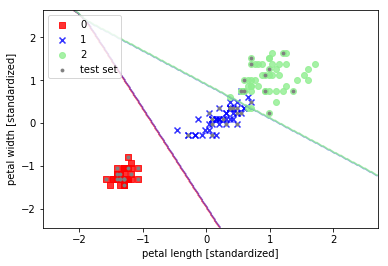

In [60]:
from sklearn.linear_model import LogisticRegression

""" ロジスティック回帰のインスタンスを生成 """

lr = LogisticRegression(C=1000, random_state=0)

""" トレーニングデータをモデルに適合させる """
lr.fit(X_train_std, y_train)

""" 決定境界をプロット """
plot_decision_reqions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

""" 軸ラベルのプロット """
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")


""" 凡例 """
plt.legend(loc="upper left")

""" show """
plt.show()

In [61]:
# help(LogisticRegression)

In [66]:
X_test_std[0:2, :]

array([[ 0.70793846,  1.50872803],
       [ 0.09545238, -0.29145882]])

In [74]:
# help(lr.predict_proba)

In [73]:
lr.predict_proba(X_test_std[0:1, :])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

### バリアンス、バイアス

- バリアンス
    - モデルのトレーニングを繰り返した場合に、モデルの予測の一貫性を測定するものである。
    - バリアンスが大きい場合は、モデルがトレーニングデータのランダム性に対して敏感であると表現できる。
    - トレーニングセットの選び方によって予測結果がばらついてしまう状況
   
- バイアス
    - モデルを異なるトレーニングデータ・セットで何度か構築した場合に、予測が正しい値からどの程度外れているかを測定するもの。
        - 真の値からどの程度離れているのかを定量化する指標
    - ランダム性によるものではなく、系統誤差（systematic error)の測定値
        - 系統誤差、偶然誤差
            - 同じ方法を用いて測定すると「真の値」に対して系統的にずれて測定される誤差
            - 測定のたびにばらつく誤差
            
### Cパラメータについて

- 正則化パラメタ λの逆数

- 小さい値にすると正則化項の影響が大きくなる。 --> 過学習を抑えることができる

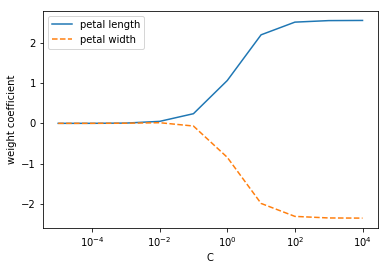

In [96]:
""" 空のリストを生成(重み係数、逆正則化パラメータ) """
weights, params = [], []

""" 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理 """
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=0)
    lr.fit(X_train_std, y_train)
    
    """ 重み係数を格納 """
    weights.append(lr.coef_[1])
    """ 逆正則化パラメタを格納 """
    params.append(10.0**c)

""" 重み係数をnumpy配列に変換 """
weights = np.array(weights)

""" 横軸に逆正則化パラメタ、縦軸に重み係数をプロット """
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
""" 横軸を対数スケールに設定 """
plt.xscale("log")
plt.show()

- Cパラメタが減少（正則化の強さが増す）すると重み係数が0に近づく

## 3.4 サポートベクターマシンによる最大マージン分類